# Import Packages and Load Dataset

In [1]:
# import relevant packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
from sklearn.metrics import r2_score

# update the path to the project folder
import sys
import os
project_path = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), ''))
sys.path.append(project_path)

# import py from src folder
from src.eda import plot_custom, barplot_compare, mannwhitney_test, chi2_test
from src.data_processing import convert_to_object, data_preparation, smote_tomek
from src.model import model, random_search

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import dataset
data = pd.read_csv(project_path+'/data/german_credit_data.csv', sep=";")
data.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonnds,Present employmnet since,Installment rate in percentage of disposable income,Personal status,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Label
0,< 0 DM,18,critical account / other credits existing (not...,furniture / equipment,1049,< 100 DM,< 1 year,4,female: divorced/separated/married,none,...,building society savings agreement / life insu...,21,none,rent,1,skilled employee / official,1,none,yes,0
1,< 0 DM,9,critical account / other credits existing (not...,car (new),2799,< 100 DM,1 - 4 years,2,male: single,none,...,real estate,36,none,rent,2,skilled employee / official,2,none,yes,0
2,0 - 200 DM,12,existing credits paid back duly till now,business,841,100 - 500 DM,4 - 7 years,2,female: divorced/separated/married,none,...,real estate,23,none,rent,1,unskilled - resident,1,none,yes,0
3,< 0 DM,12,critical account / other credits existing (not...,car (new),2122,< 100 DM,1 - 4 years,3,male: single,none,...,real estate,39,none,rent,2,unskilled - resident,2,none,no,0
4,< 0 DM,12,critical account / other credits existing (not...,car (new),2171,< 100 DM,1 - 4 years,4,male: single,none,...,building society savings agreement / life insu...,38,bank,own,2,unskilled - resident,1,none,no,0


# EDA

In this section, we checked the data types and null values in the dataset. Some features have incorrect data types, which were corrected accordingly. Furthermore, it shows that our dataset does not have any null values, so no further action is needed. Finally, we split the dataset based on the label (default and not default) and checked the data size.

In [4]:
# checking data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonnds                                    1000 non-null   object
 6   Present employmnet since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status              

In [5]:
# convert data type into its correct type
columns_to_convert = ['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonnds', 'Present employmnet since', 'Personal status', 'Other debtors / guarantors', 'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 'Foreign worker']

data = convert_to_object(data, columns_to_convert)

In [6]:
# checking null values
data.isnull().sum()

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonnds                                      0
Present employmnet since                                    0
Installment rate in percentage of disposable income         0
Personal status                                             0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [7]:
# split to not default and default
df_0 = data.loc[data['Label']==0]
df_1 = data.loc[data['Label']==1]

print('Data Shape: ',data.shape)
print('Data Default Shape: ',df_0.shape)
print('Data Not Default Shape: ',df_1.shape)

Data Shape:  (1000, 21)
Data Default Shape:  (700, 21)
Data Not Default Shape:  (300, 21)


## Descriptive Statistics

### Numerical Columns

Here, each numerical columns is examined to analyze the data distribution using bar plot.

In [8]:
# numerical variable
data.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Label
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.24800,2.973000,2.845000,35.54200,1.407000,1.155000,0.300000
std,12.058814,2822.75176,1.118715,1.103718,11.35267,0.577654,0.362086,0.458487
min,4.000000,250.00000,1.000000,1.000000,19.00000,1.000000,1.000000,0.000000
25%,12.000000,1365.50000,2.000000,2.000000,27.00000,1.000000,1.000000,0.000000
50%,18.000000,2319.50000,3.000000,3.000000,33.00000,1.000000,1.000000,0.000000
75%,24.000000,3972.25000,4.000000,4.000000,42.00000,2.000000,1.000000,1.000000
max,72.000000,18424.00000,4.000000,4.000000,75.00000,4.000000,2.000000,1.000000


### `Duration in month`

Text(0.5, 1.0, 'Duration in month')

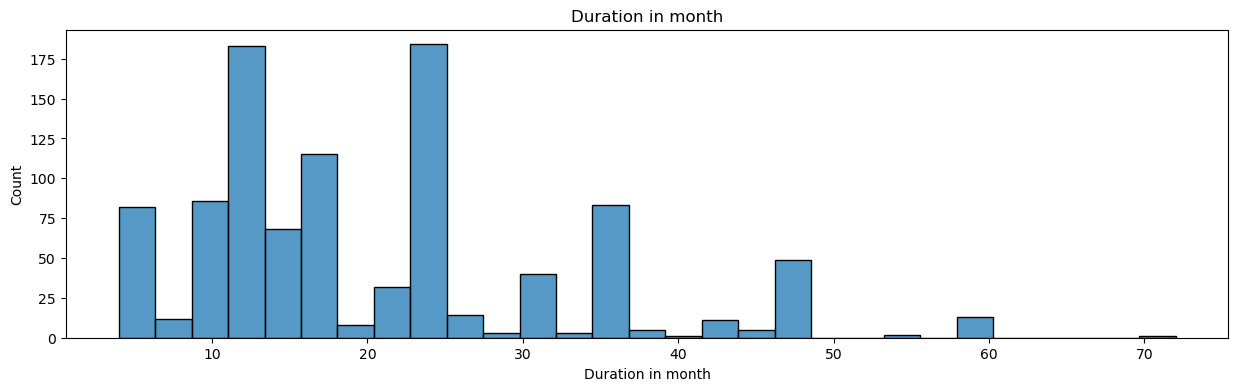

In [9]:
plot_custom(data, x_val = 'Duration in month',types = "hist")
plt.title('Duration in month')

### `Credit amount`

Text(0.5, 1.0, 'Credit amount')

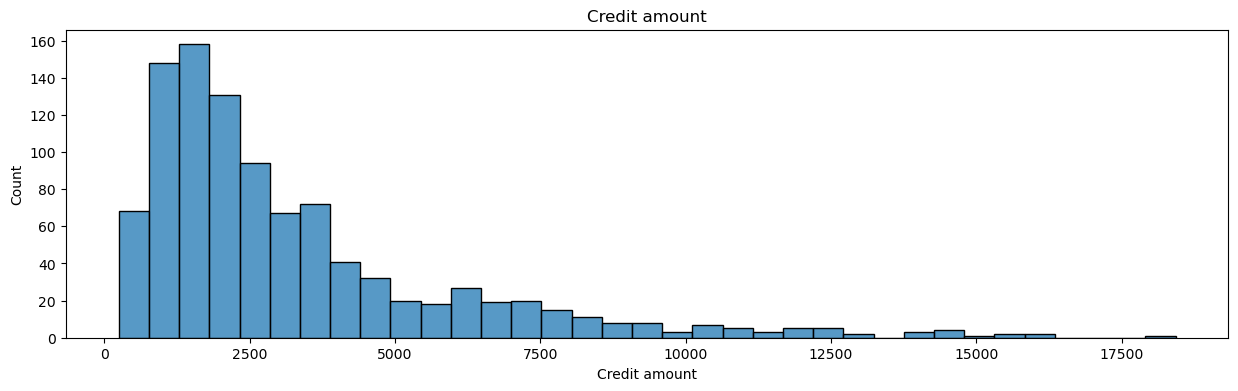

In [10]:
plot_custom(data, x_val = 'Credit amount',types = "hist")
plt.title('Credit amount')

### `Installment rate in percentage of disposable income`

Text(0.5, 1.0, 'Installment rate in percentage of disposable income')

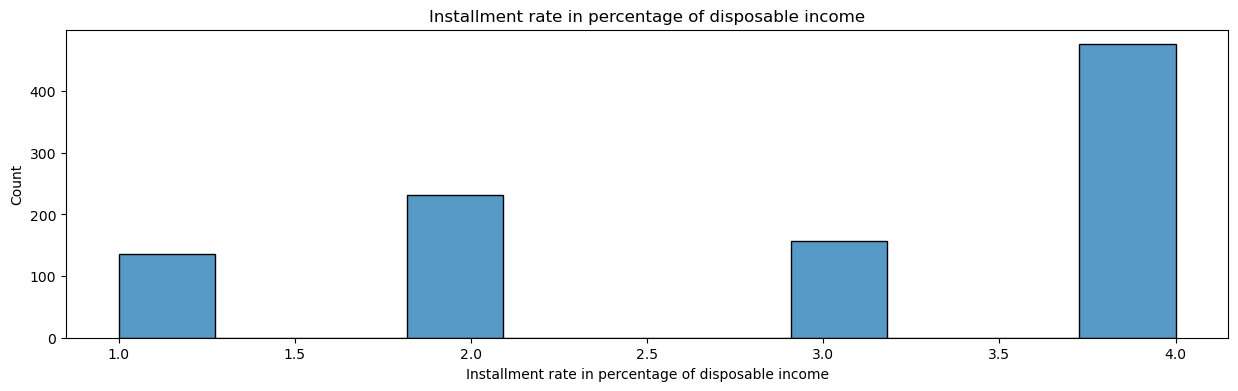

In [11]:
plot_custom(data, x_val = 'Installment rate in percentage of disposable income',types = "hist")
plt.title('Installment rate in percentage of disposable income')

### `Present residence since`

Text(0.5, 1.0, 'Present residence since')

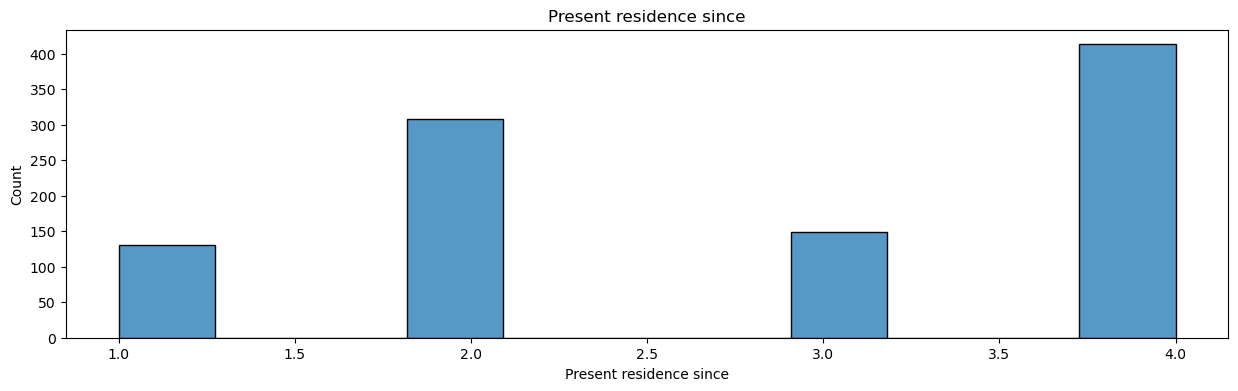

In [12]:
plot_custom(data, x_val = 'Present residence since',types = "hist")
plt.title('Present residence since')

### `Age in years`

Text(0.5, 1.0, 'Age in years')

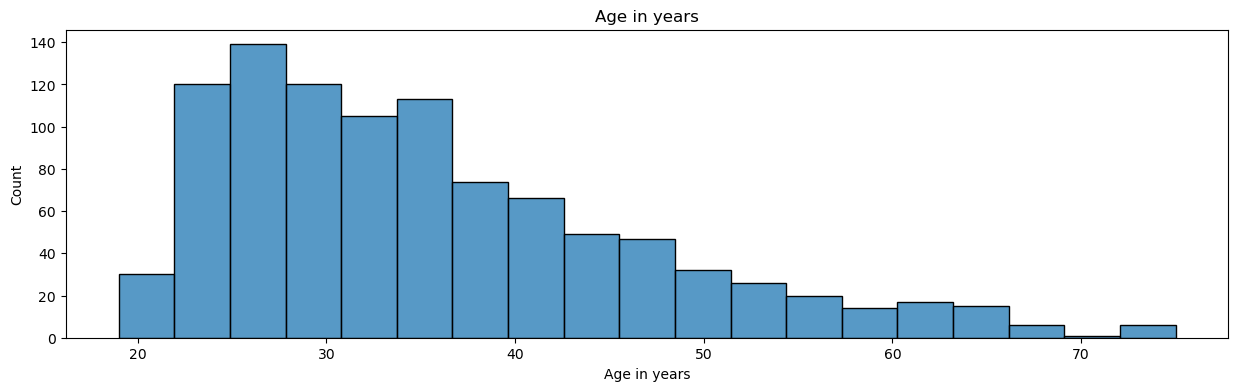

In [13]:
plot_custom(data, x_val = 'Age in years',types = "hist")
plt.title('Age in years')

### `Number of existing credits at this bank`

Text(0.5, 1.0, 'Number of existing credits at this bank')

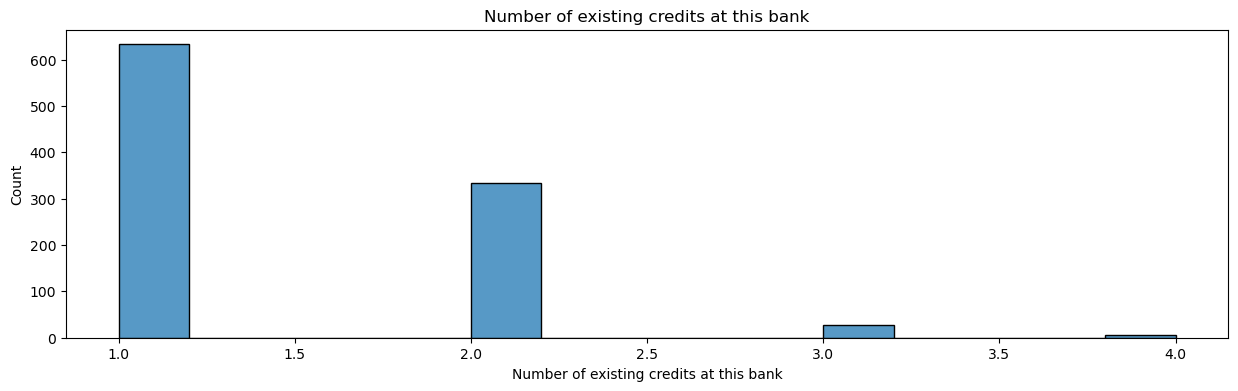

In [14]:
plot_custom(data, x_val = 'Number of existing credits at this bank',types = "hist")
plt.title('Number of existing credits at this bank')

### `Number of people being liable to provide maintenance for`

Text(0.5, 1.0, 'Number of people being liable to provide maintenance for')

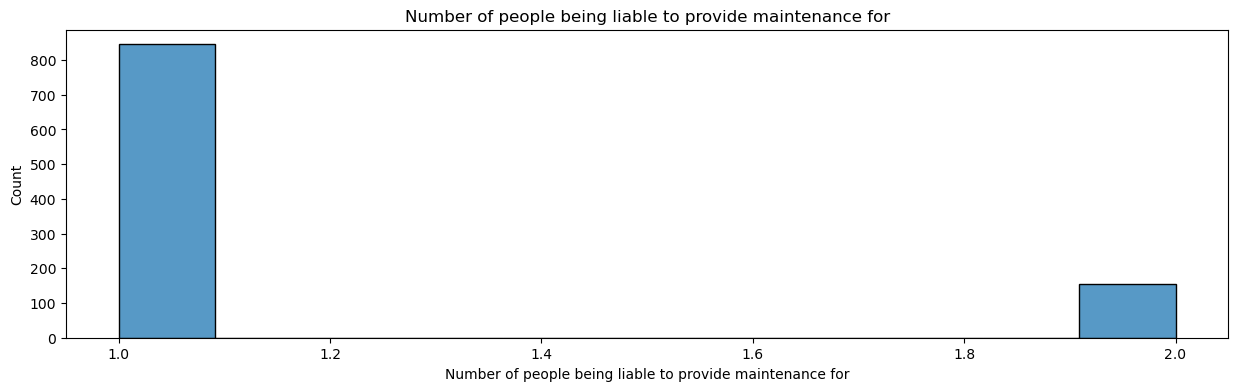

In [15]:
plot_custom(data, x_val = 'Number of people being liable to provide maintenance for',types = "hist")
plt.title('Number of people being liable to provide maintenance for')

The chart shows that the distributions of `Credit amount` and `Age in years` are skewed. Log transformation will be applied to these variables in the data processing section below to improve the modeling.

### Categorical Columns

For categorical columns, bar plots are used to compare the proportions of each category between the default and non-default populations to get a better understanding of the patterns within each category.

In [16]:
# categorical variable
data.describe(include='object')

,Status of existing checking account,Credit history,Purpose,Savings account/bonnds,Present employmnet since,Personal status,Other debtors / guarantors,Property,Other installment plans,Housing,Job,Telephone,Foreign worker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,no checking account,existing credits paid back duly till now,radio / television,< 100 DM,1 - 4 years,male: single,none,car or other,none,own,skilled employee / official,none,yes
freq,394,530,280,603,339,548,907,332,814,714,630,596,963


### `Status of existing checking account`

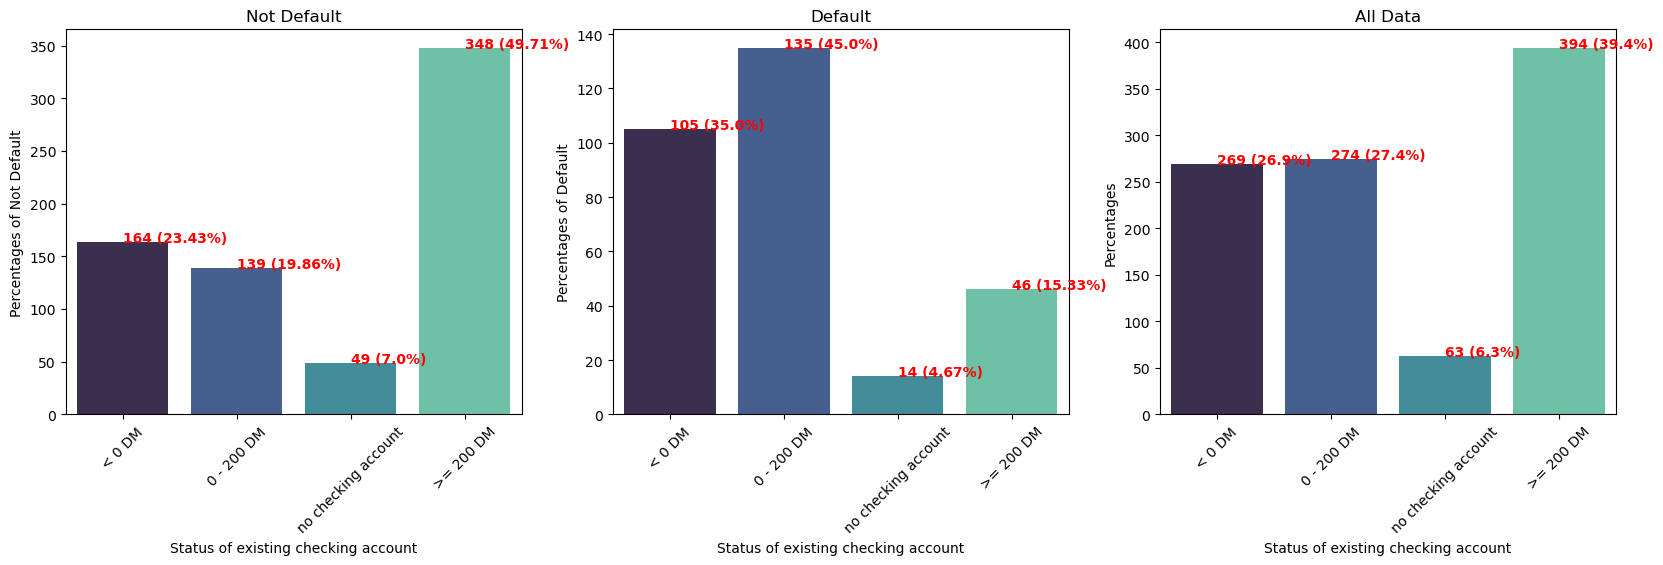

In [17]:
barplot_compare(data, 'Status of existing checking account')

### `Credit history`

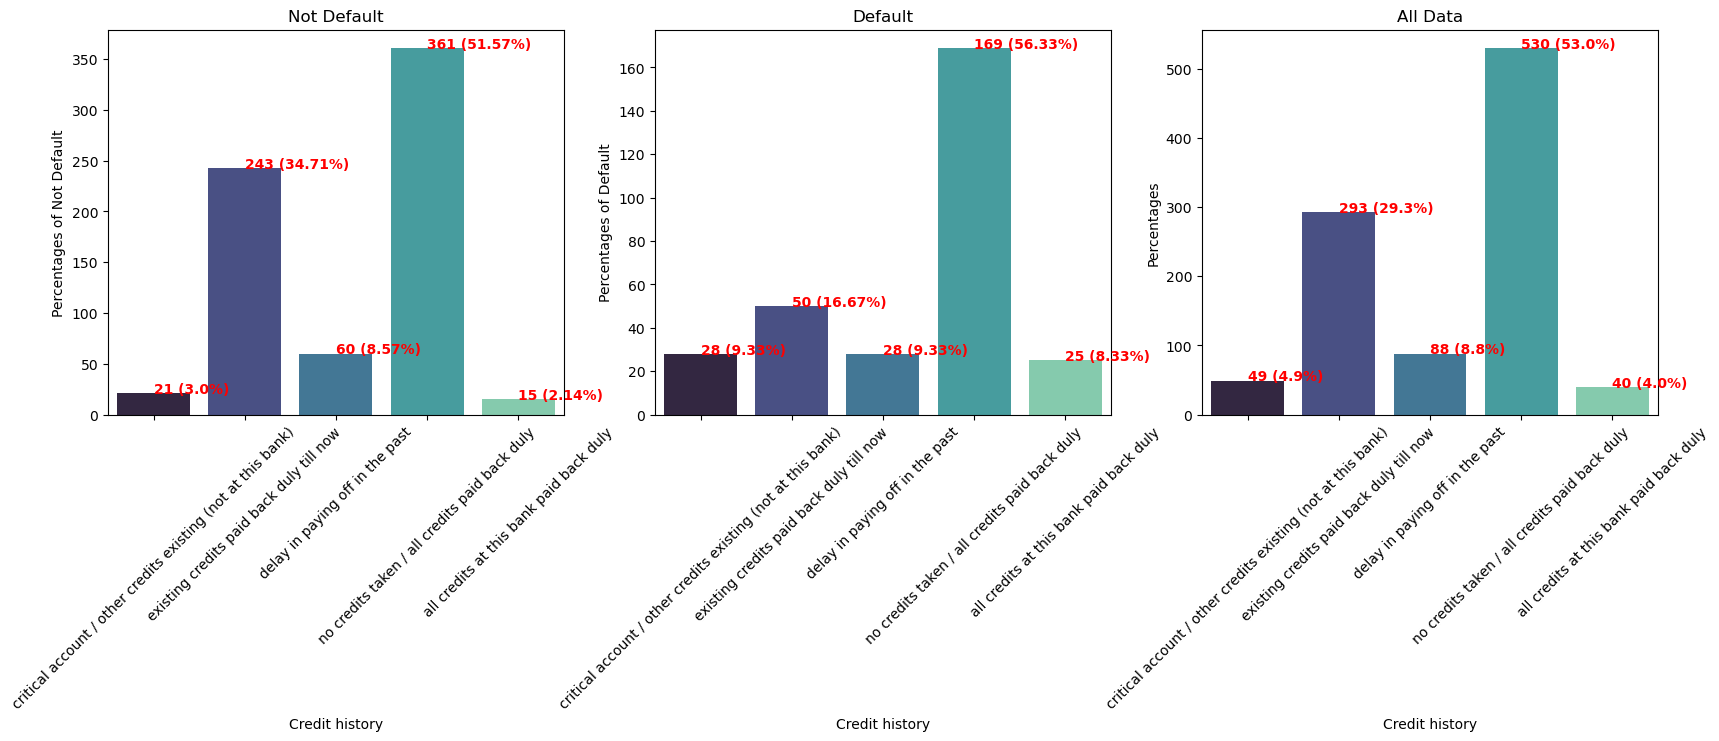

In [18]:
barplot_compare(data, 'Credit history')

### `Purpose`

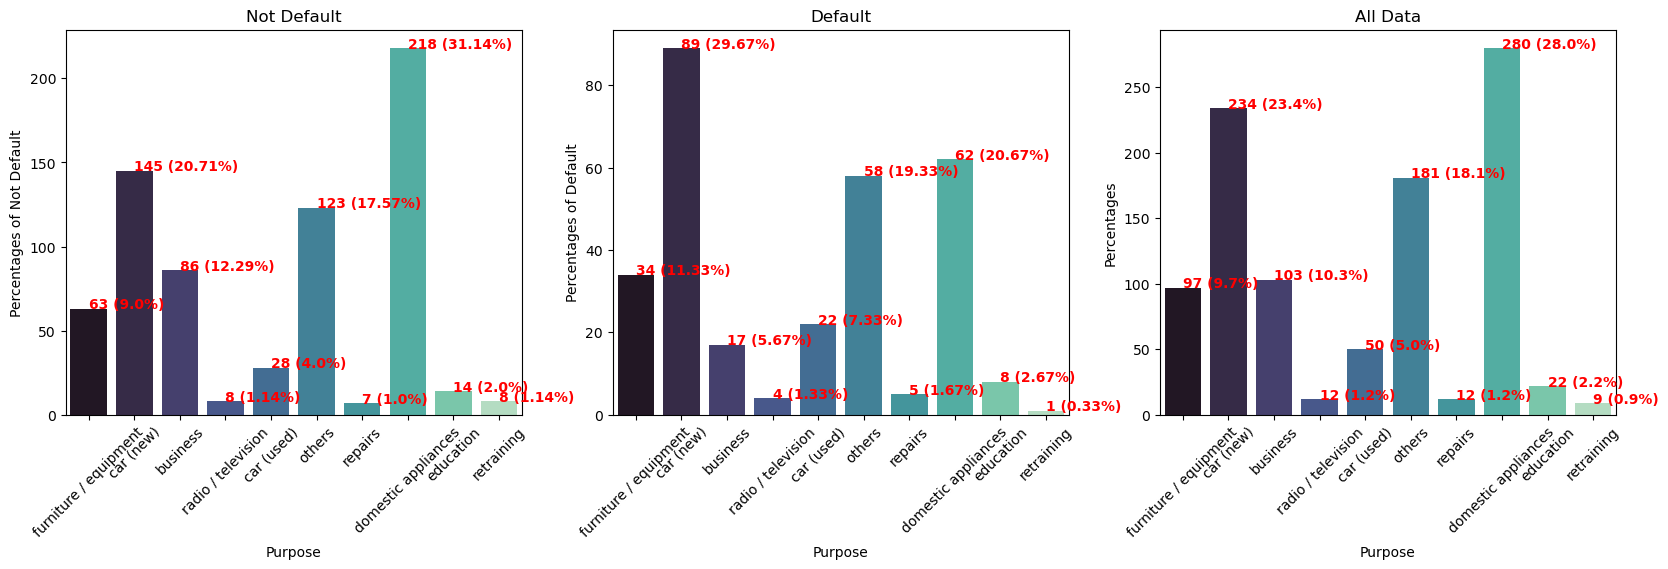

In [19]:
barplot_compare(data, 'Purpose')

### `Savings account/bonnds`

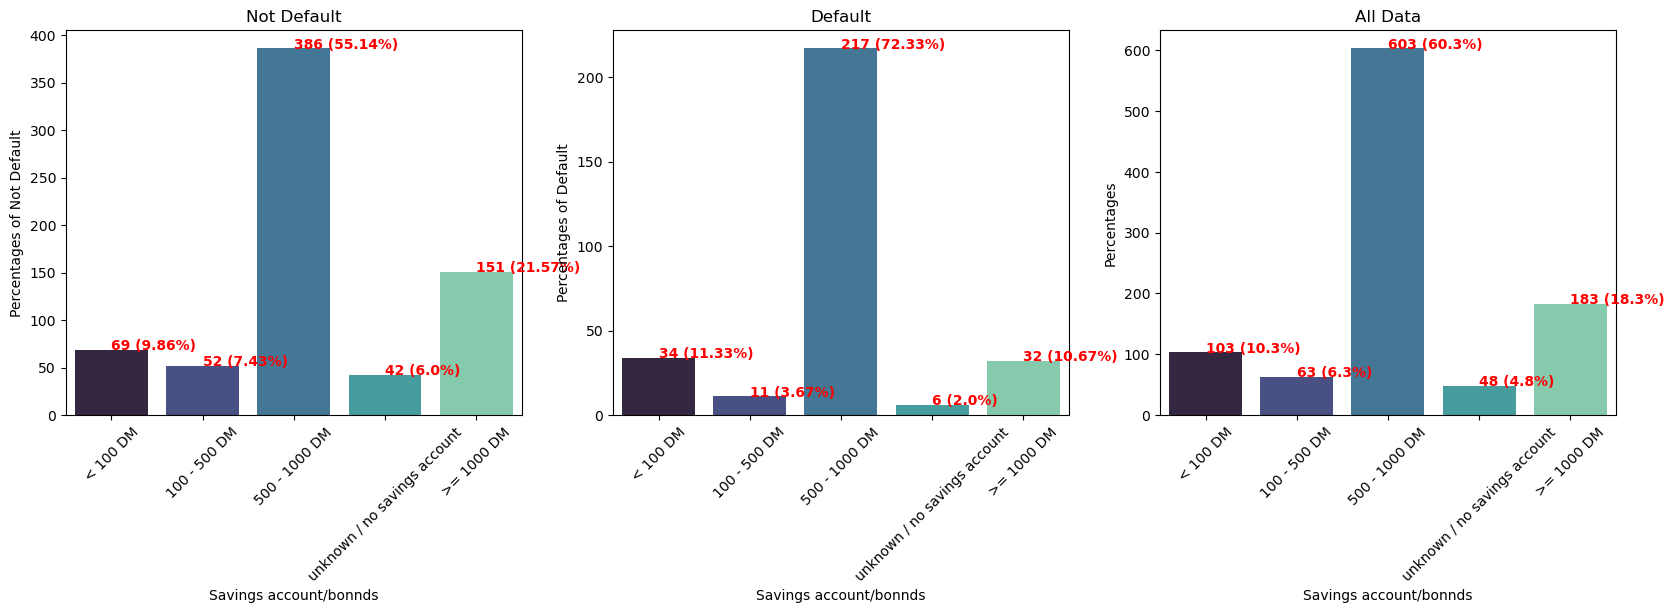

In [20]:
barplot_compare(data, 'Savings account/bonnds')

### `Present employmnet since`

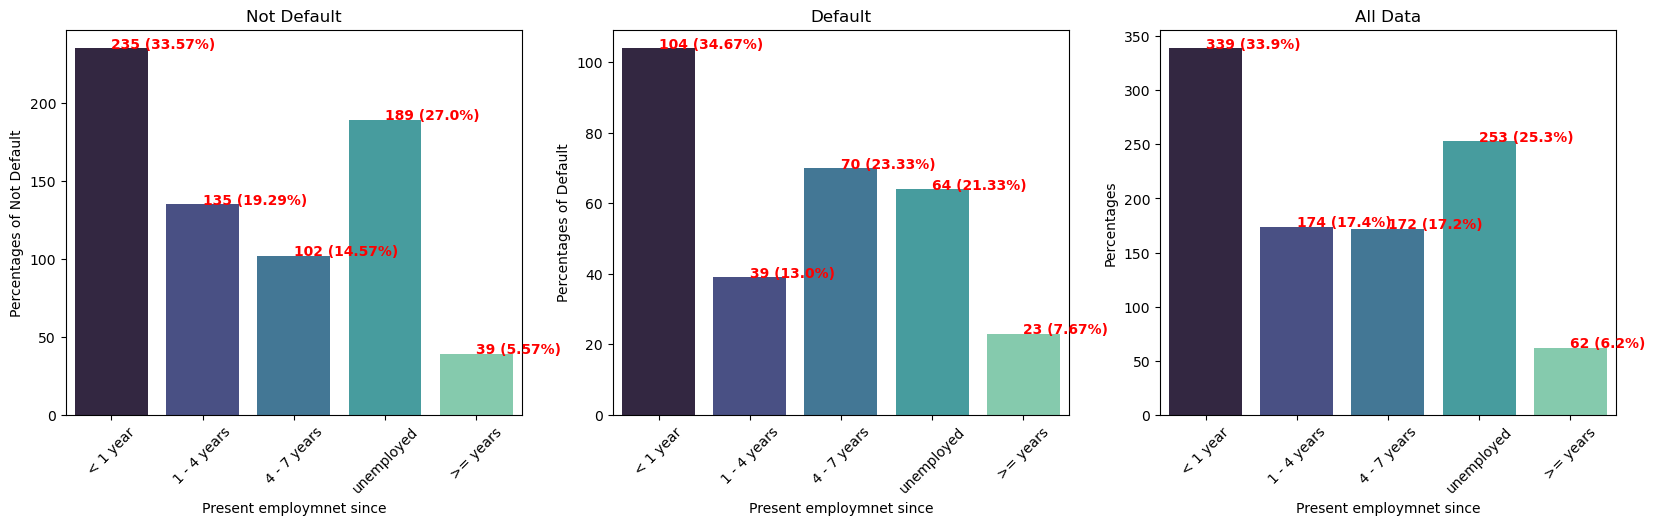

In [21]:
barplot_compare(data, 'Present employmnet since')

### `Personal status`

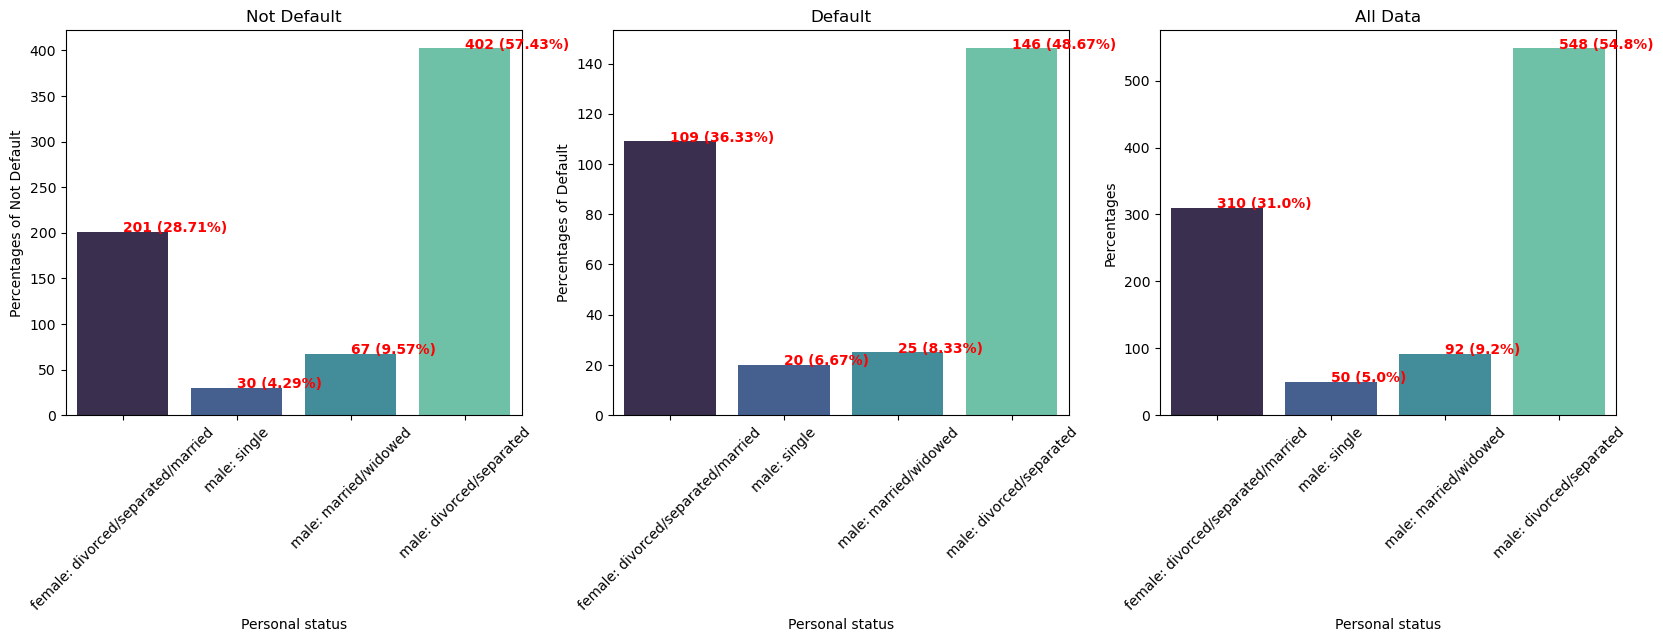

In [22]:
barplot_compare(data, 'Personal status')

### `Other debtors / guarantors`

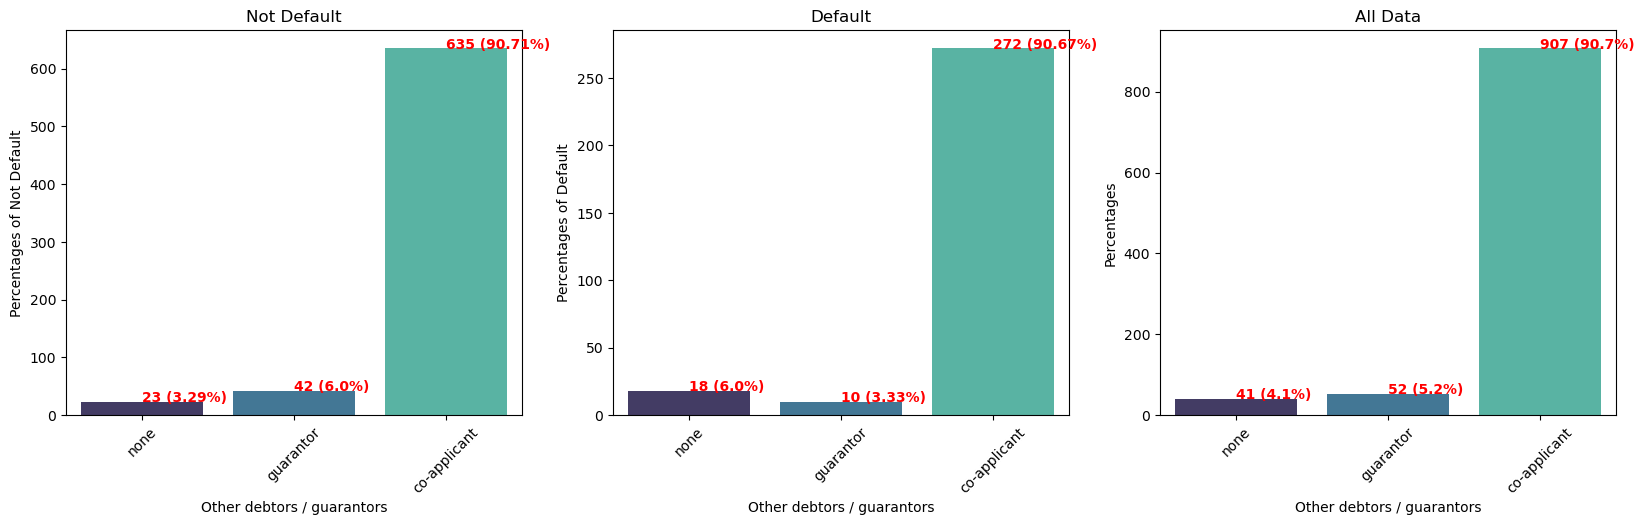

In [23]:
barplot_compare(data, 'Other debtors / guarantors')

### `Property`

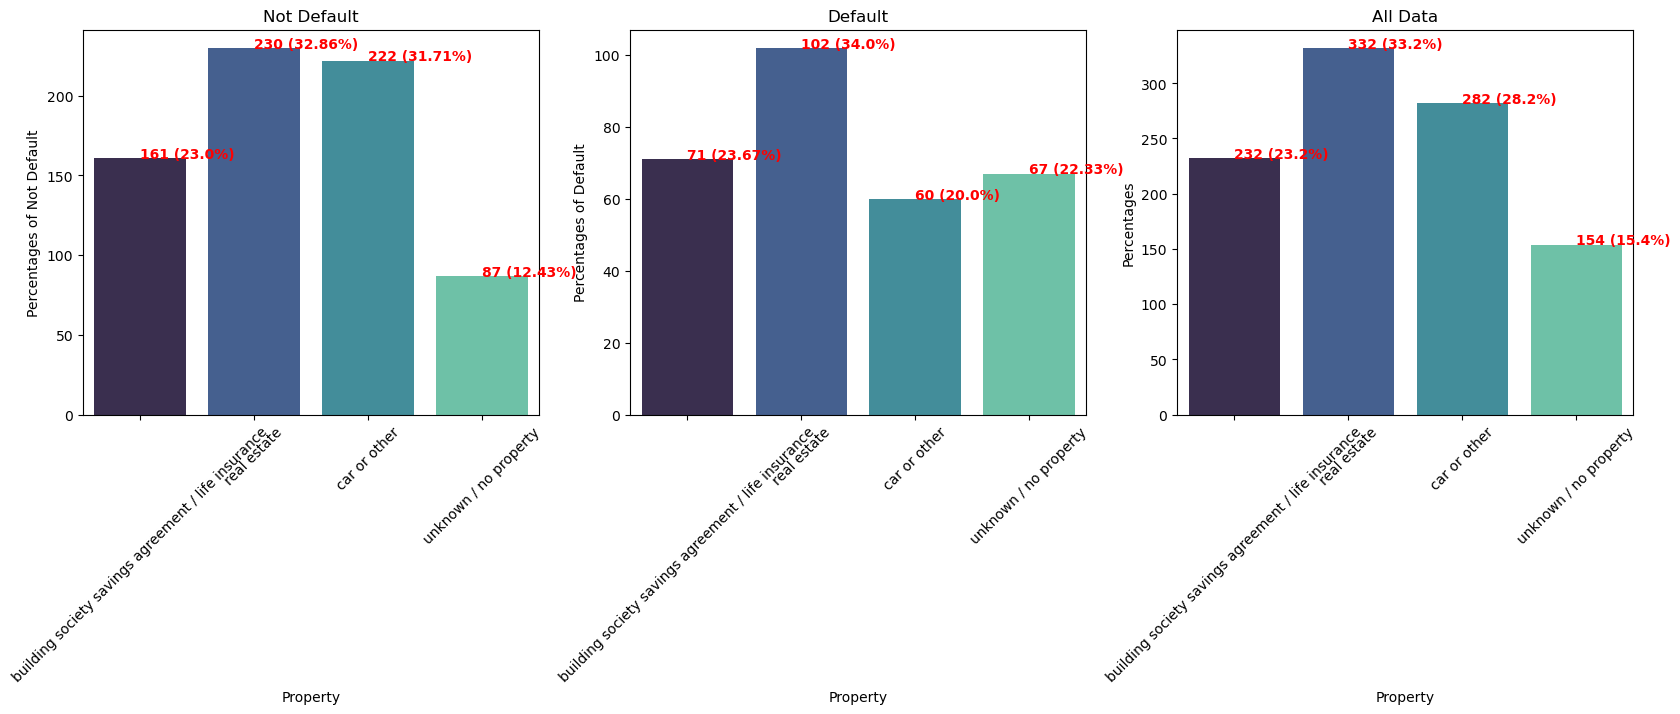

In [24]:
barplot_compare(data, 'Property')

### `Other installment plans`

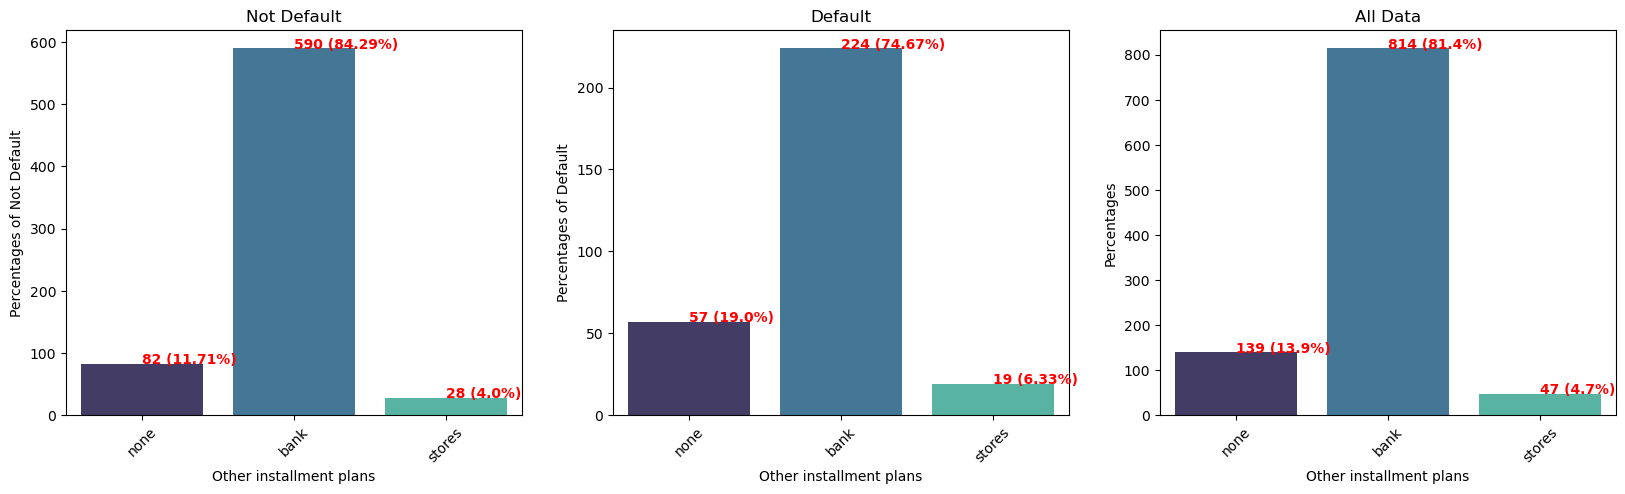

In [25]:
barplot_compare(data, 'Other installment plans')

### `Housing`

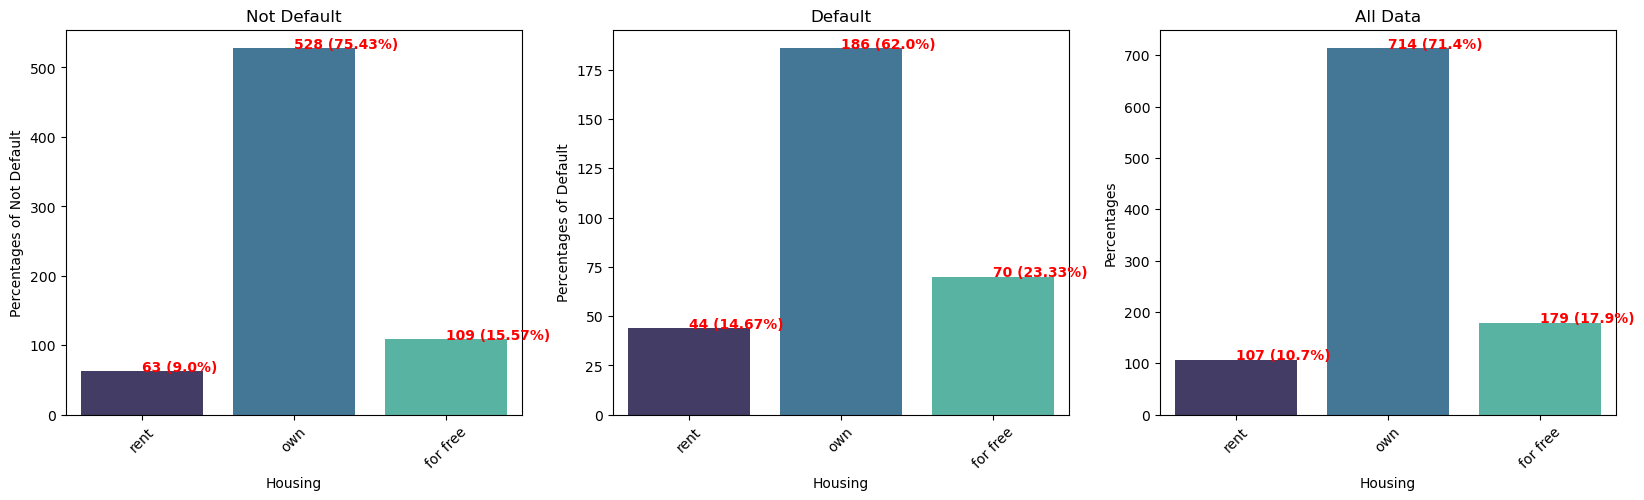

In [26]:
barplot_compare(data, 'Housing')

### `Job`

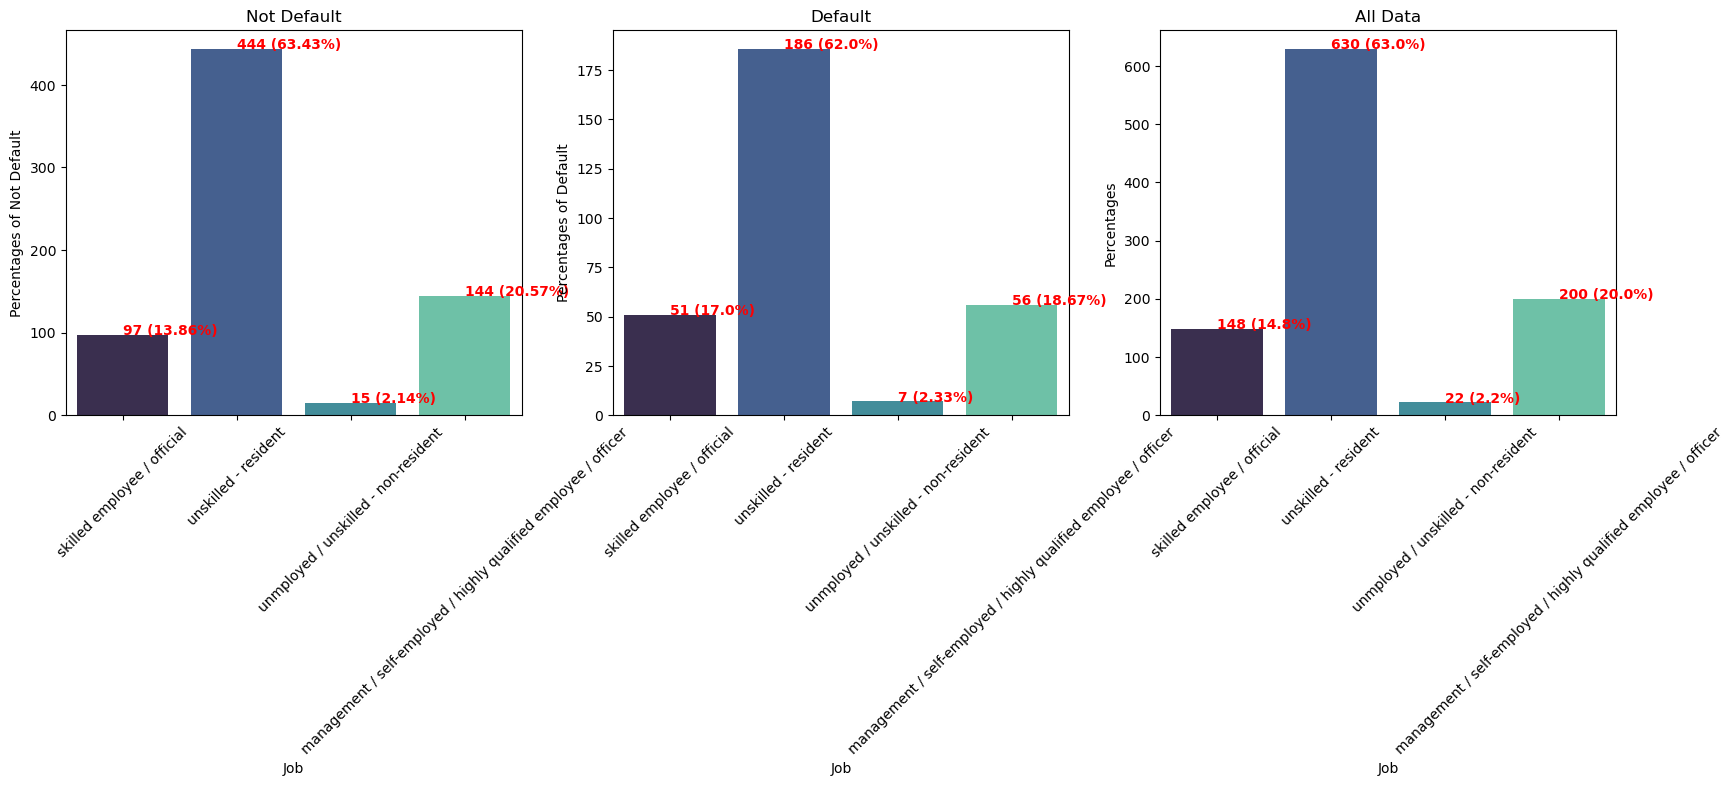

In [27]:
barplot_compare(data, 'Job')

### `Telephone`

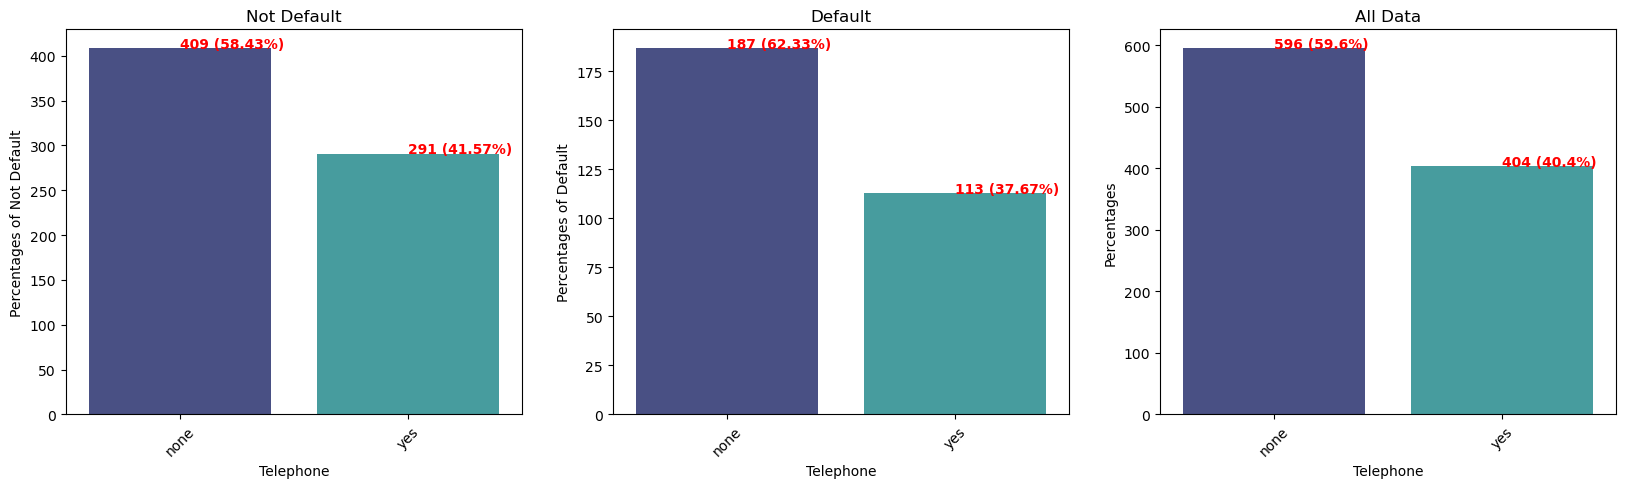

In [28]:
barplot_compare(data, 'Telephone')

### `Foreign worker`

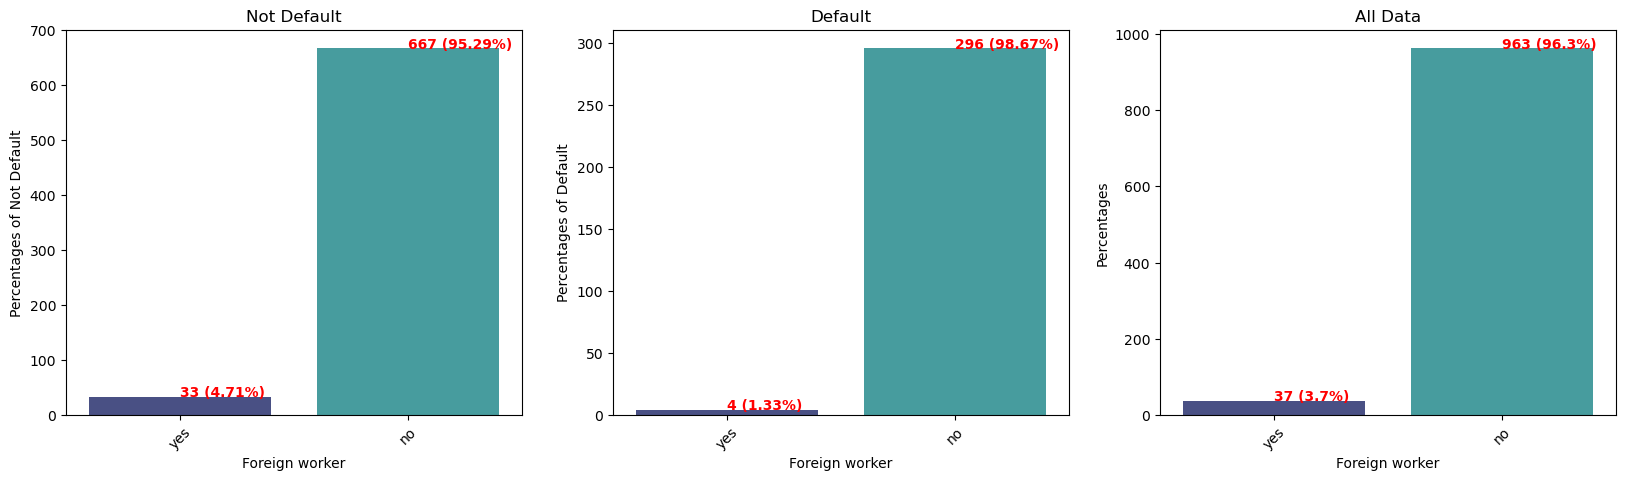

In [29]:
barplot_compare(data, 'Foreign worker')

From the bar plots, we obtained the following insights:
1. People with 'existing credits paid back duly till now' or 'no credits taken / all credits paid back duly' are less likely to default.
2. Credits taken for purchasing expensive items, such as new cars and domestic appliances, are more likely to default.
3. Individuals with medium savings are more likely to take out a credit.
4. People with shorter employment durations and do not own property are more likely to default.
5. Many credit are owned by 'men: divorced/separated' and 'unskilled' individuals.

## Bivariate Analysis (Feature Selection)
This section examines the relationship between each features with the target column, `Label`. 

For numerical columns, we use the non-parametric t-test to compare the distributions of the default and non-default population for each feature. If the null hypothesis is rejected, it indicates that the default and non-default population have different distribution, meaning the feature has dependency in determining the target column value. We also use box plots to visualize the distribution difference in default and non-default population.

For categorical columns, we use the chi-square test to assess the dependency of each feature to the target column. Similarly, if the null hypothesis is rejected, it indicates a dependency relationship between the feature and target column.

### Numerical Columns

### `Duration in  month`

Column:  Duration in month
Non-Parametric t-test (independent)
(stat = 77995.500, p = 0.000)

Different distribution (reject H0)
The difference between groups is -5.7 [-12.2 to 0.9] (mean [95% CI])


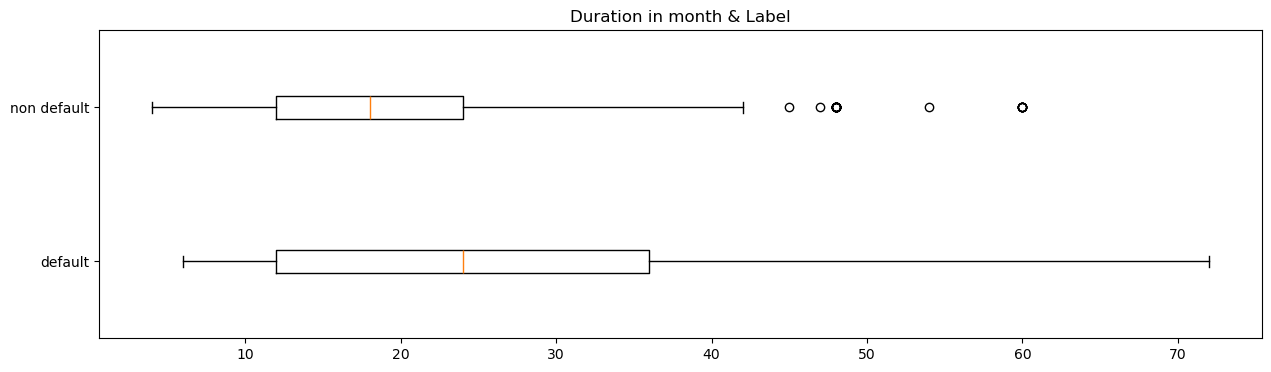

In [30]:
mannwhitney_test(data, 'Label', 'Duration in month','Duration in month & Label')

### `Credit amount`

Column:  Credit amount
Non-Parametric t-test (independent)
(stat = 93480.000, p = 0.006)

Different distribution (reject H0)
The difference between groups is -952.7 [-1338.4 to -567.0] (mean [95% CI])


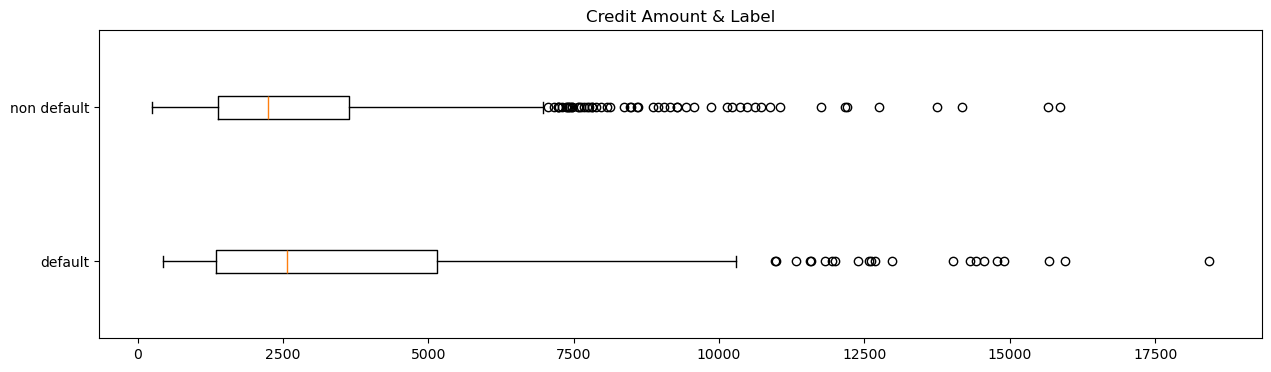

In [31]:
mannwhitney_test(data, 'Label', 'Credit amount','Credit Amount & Label')

### `Installment rate in percentage of disposable income`

Column:  Installment rate in percentage of disposable income
Non-Parametric t-test (independent)
(stat = 95889.500, p = 0.020)

Different distribution (reject H0)
The difference between groups is -0.2 [-2.1 to 1.7] (mean [95% CI])


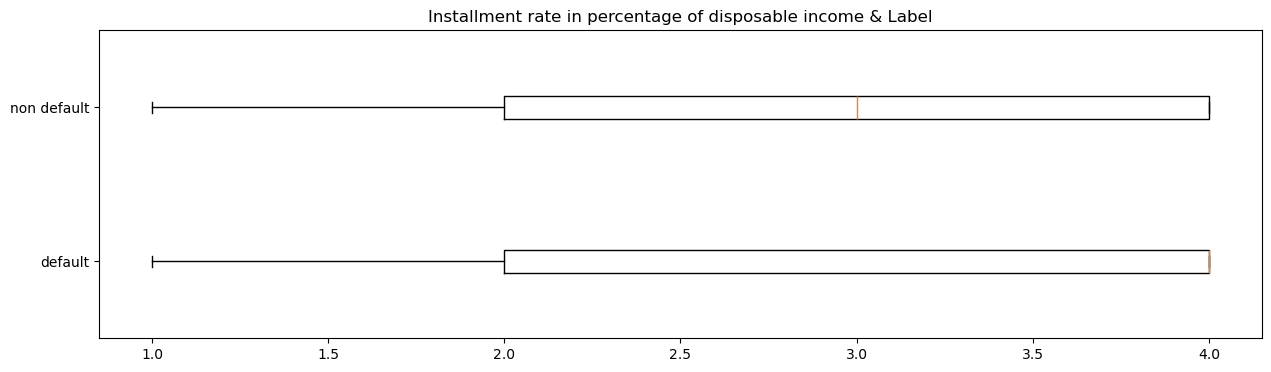

In [32]:
mannwhitney_test(data, 'Label', 'Installment rate in percentage of disposable income','Installment rate in percentage of disposable income & Label')

### `Present residence since`

Column:  Present residence since
Non-Parametric t-test (independent)
(stat = 104680.500, p = 0.936)

Same distribution (fail to reject H0)
The difference between groups is -0.0 [-1.9 to 1.9] (mean [95% CI])


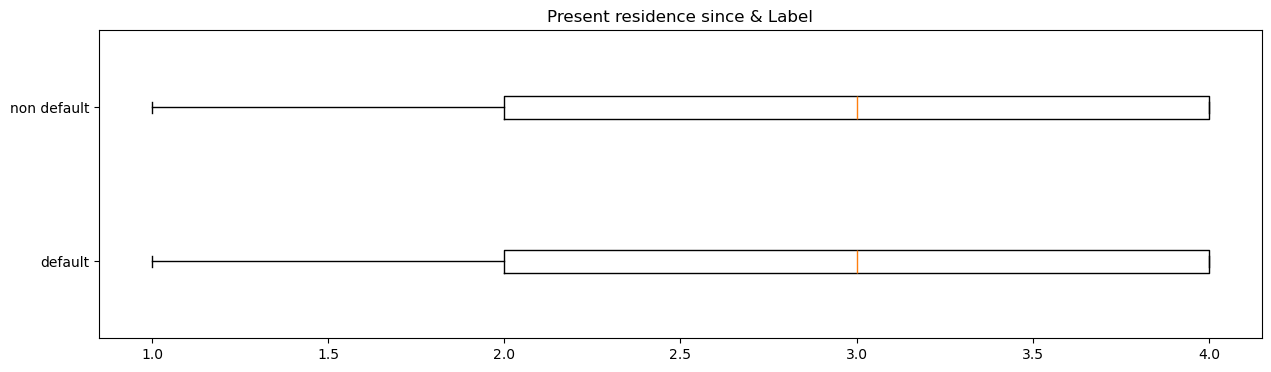

In [33]:
mannwhitney_test(data, 'Label', 'Present residence since','Present residence since & Label')

### `Age in years`

Column:  Age in years
Non-Parametric t-test (independent)
(stat = 119971.500, p = 0.000)

Different distribution (reject H0)
The difference between groups is 2.3 [-2.2 to 6.7] (mean [95% CI])


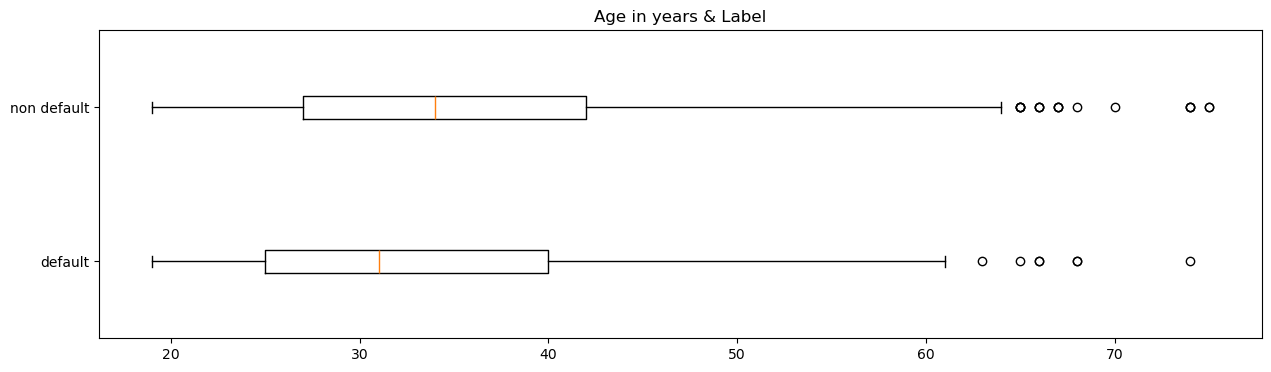

In [34]:
mannwhitney_test(data, 'Label', 'Age in years','Age in years & Label')

### `Number of existing credits at this bank`

Column:  Number of existing credits at this bank
Non-Parametric t-test (independent)
(stat = 110272.000, p = 0.135)

Same distribution (fail to reject H0)
The difference between groups is 0.1 [-0.9 to 1.0] (mean [95% CI])


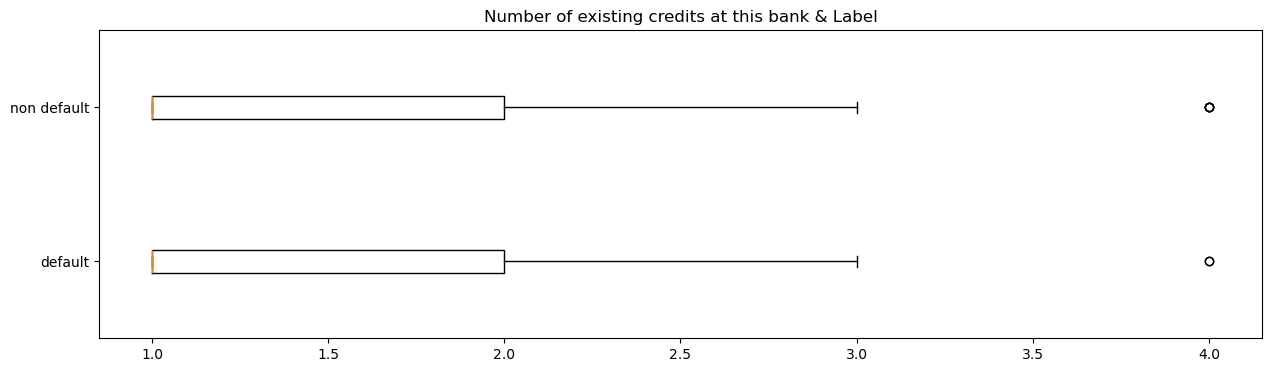

In [35]:
mannwhitney_test(data, 'Label', 'Number of existing credits at this bank','Number of existing credits at this bank & Label')

### `Number of people being liable to provide maintenance for`

Column:  Number of people being liable to provide maintenance for
Non-Parametric t-test (independent)
(stat = 105250.000, p = 0.924)

Same distribution (fail to reject H0)
The difference between groups is 0.0 [-1.6 to 1.6] (mean [95% CI])


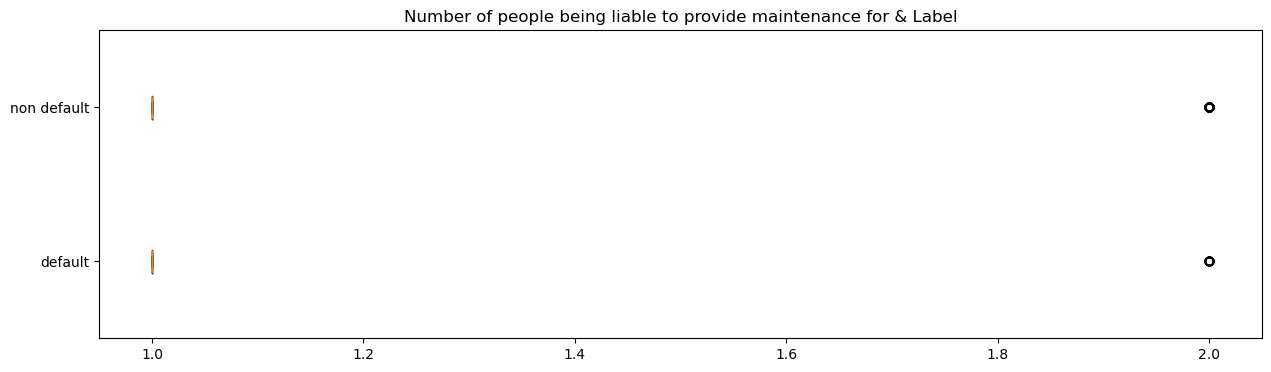

In [36]:
mannwhitney_test(data, 'Label', 'Number of people being liable to provide maintenance for','Number of people being liable to provide maintenance for & Label')

From the boxplot, we obtained the following insights:
1. The duration to pay the loan is longer to default individuals.
2. Larger credit amount and installment rate are more likely to default. 
3. Younger people have a higher risk to default compared to older individuals.

Lastly, it shows that the columns `Present residence since`, `Number of existing credits at this bank`, and `Number of people being liable to provide maintenance for` have same distribution between default and non-default population.

### Categorical Columns

In [37]:
# checking relation of each categorical columns to 'Label'
object_cols = list(data.select_dtypes(include='object'))
for cols in object_cols:
    chi2_test(data,cols)

Column:  Status of existing checking account
Chi-Square test
Dependent on each other (reject H0)
(stat = 123.721, p = 0.000)
---------------------------------
Column:  Credit history
Chi-Square test
Dependent on each other (reject H0)
(stat = 61.691, p = 0.000)
---------------------------------
Column:  Purpose
Chi-Square test
Dependent on each other (reject H0)
(stat = 33.356, p = 0.000)
---------------------------------
Column:  Savings account/bonnds
Chi-Square test
Dependent on each other (reject H0)
(stat = 36.099, p = 0.000)
---------------------------------
Column:  Present employmnet since
Chi-Square test
Dependent on each other (reject H0)
(stat = 18.368, p = 0.001)
---------------------------------
Column:  Personal status
Chi-Square test
Dependent on each other (reject H0)
(stat = 9.605, p = 0.022)
---------------------------------
Column:  Other debtors / guarantors
Chi-Square test
Dependent on each other (reject H0)
(stat = 6.645, p = 0.036)
-------------------------------

From the chi-square test, it shows that `Job` and `Telephone` are independent to `Label`.

# Data Preparation

We will examine the model performance using three scenarios:
1. Including all features without scaling.
2. Including all features with scaling.
3. Using only the features with dependency to the target column based on the EDA results.

Later, we will evaluate the performance of the trained model using these three scenarios with two machine learning algorithms: Logistic Regression and Random Forest, to determine which approach works best for our dataset.

In [38]:
# import dataset
data = pd.read_csv(project_path+'/data/german_credit_data.csv', sep=";")

In [39]:
data_prep = data_preparation()
data_prep.sample_data(data,columns_to_convert)
data_prep.fe_data()

Data Shape:  (1000, 21)
Data Train Shape:  (800, 21)
Data Test Shape:  (200, 21)
train -  [560 240]   |   test -  [140  60]


In [40]:
data_prep_without_scaler = data_preparation()
data_prep_without_scaler.sample_data(data,columns_to_convert)
data_prep_without_scaler.fe_data(scaling = False)

Data Shape:  (1000, 21)
Data Train Shape:  (800, 21)
Data Test Shape:  (200, 21)
train -  [560 240]   |   test -  [140  60]


In [41]:
data_fs = data.drop(['Present residence since','Number of existing credits at this bank','Number of people being liable to provide maintenance for','Job','Telephone'],axis = 1)
data_prep_fs = data_preparation()
data_prep_fs.sample_data(data,columns_to_convert)
data_prep_fs.fe_data()

Data Shape:  (1000, 21)
Data Train Shape:  (800, 21)
Data Test Shape:  (200, 21)
train -  [560 240]   |   test -  [140  60]


### Over-sampling using SMOTE

Here, we also implement oversampling with SMOTE to address the imbalanced dataset. This technique will be utilized to determine whether it improves the performance of the credit scoring model.

In [42]:
X_train_sam, y_train_sam = smote_tomek(data_prep.X_train,data_prep.y_train,print_result=False)

In [43]:
X_train_sam_without_scaler, y_train_sam_without_scaler = smote_tomek(data_prep_without_scaler.X_train,data_prep_without_scaler.y_train,print_result=False)

In [44]:
X_train_sam_fs, y_train_sam_fs = smote_tomek(data_prep_fs.X_train,data_prep_fs.y_train,print_result=True)

Original dataset shape: 0:  560 1:  240
Sampling dataset shape: 0:  531 1:  280
majority data reduce: 5.18%
minority data generate: 16.67%


# Model 1: Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Accuracy: 0.745 | Precision: 0.615 | Recall: 0.4 | F1-Score: 0.485 | AUC: 0.646 
Confusion Matrix: 
 [[125  15]
 [ 36  24]]


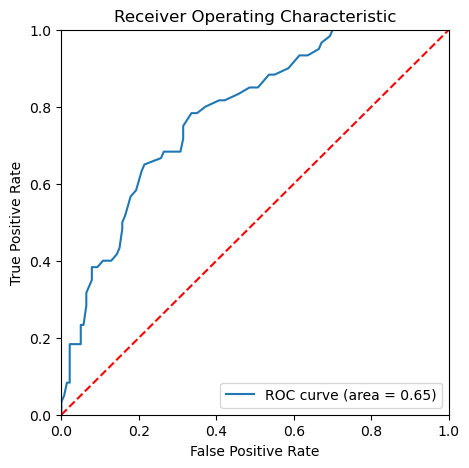

In [46]:
# all features with scaling
rf_model = RandomForestClassifier(random_state=0)
rf_model_with_scaler = model(rf_model,data_prep.X_train,data_prep.X_test,data_prep.y_train.iloc[:,0].ravel(),data_prep.y_test)

Accuracy: 0.745 | Precision: 0.615 | Recall: 0.4 | F1-Score: 0.485 | AUC: 0.646 
Confusion Matrix: 
 [[125  15]
 [ 36  24]]


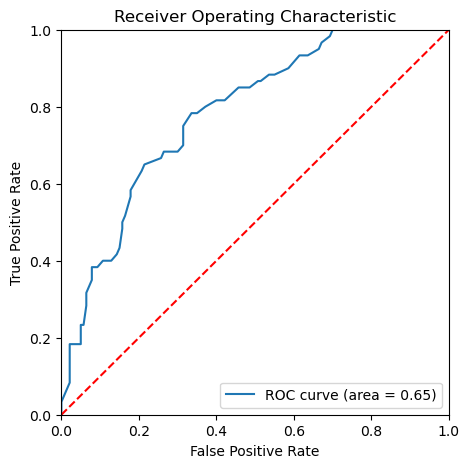

In [47]:
# all features without scaler
rf_model = RandomForestClassifier(random_state=0)
rf_model_without_scaler = model(rf_model,data_prep_without_scaler.X_train,data_prep_without_scaler.X_test,data_prep_without_scaler.y_train.iloc[:,0].ravel(),data_prep_without_scaler.y_test)

Accuracy: 0.745 | Precision: 0.615 | Recall: 0.4 | F1-Score: 0.485 | AUC: 0.646 
Confusion Matrix: 
 [[125  15]
 [ 36  24]]


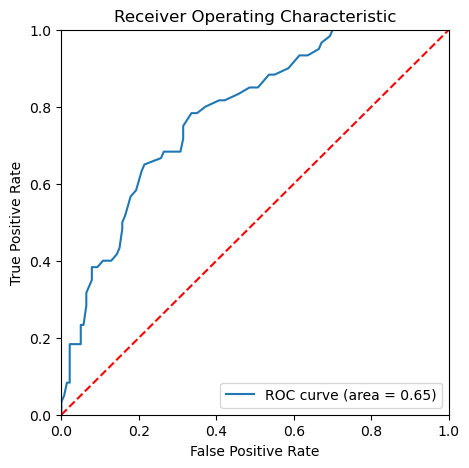

In [48]:
# feature selection
rf_model = RandomForestClassifier(random_state=0)
rf_model_fs = model(rf_model,data_prep_fs.X_train,data_prep_fs.X_test,data_prep_fs.y_train.iloc[:,0].ravel(),data_prep_fs.y_test)

## Hyperparameter Tuning with Random Search

In [49]:
# Random Search
params = {
    "criterion" : ['gini', 'entropy'],
    "n_estimators": np.arange(50,1000,10),
    "max_depth": np.arange(5,11,1),
    "min_samples_split": np.arange(2,101,5),
    "min_samples_leaf":np.arange(1,101,5),
    "min_impurity_decrease":np.arange(0,10),
    "max_features" : ['auto', 'sqrt', 'log2']
    }
rf_model = RandomForestClassifier(random_state=0)
rf_random_search=random_search(parameters=params,X=data_prep.X_train,y=data_prep.y_train.iloc[:,0].ravel(),model=rf_model,iter=100)

Best Parameters: RandomForestClassifier(max_depth=7, min_impurity_decrease=0,
                       min_samples_leaf=11, min_samples_split=17,
                       n_estimators=300, random_state=0)


Accuracy: 0.745 | Precision: 0.667 | Recall: 0.3 | F1-Score: 0.414 | AUC: 0.618 
Confusion Matrix: 
 [[131   9]
 [ 42  18]]


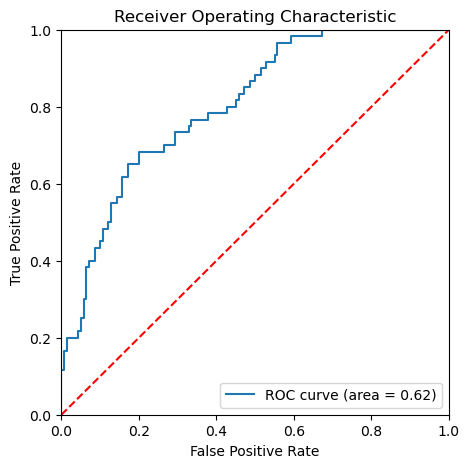

In [50]:
# all features with scaling & hyperparameter tuning
rf_model_tunning = RandomForestClassifier(max_depth=10, min_impurity_decrease=0,
                       min_samples_leaf=6, min_samples_split=22,
                       n_estimators=480, random_state=0)
rf_model_random_search = model(rf_model_tunning,data_prep.X_train,data_prep.X_test,data_prep.y_train.iloc[:,0].ravel(),data_prep.y_test)

## Oversampling with SMOTE-TomekLink

Accuracy: 0.75 | Precision: 0.604 | Recall: 0.483 | F1-Score: 0.537 | AUC: 0.674 
Confusion Matrix: 
 [[121  19]
 [ 31  29]]


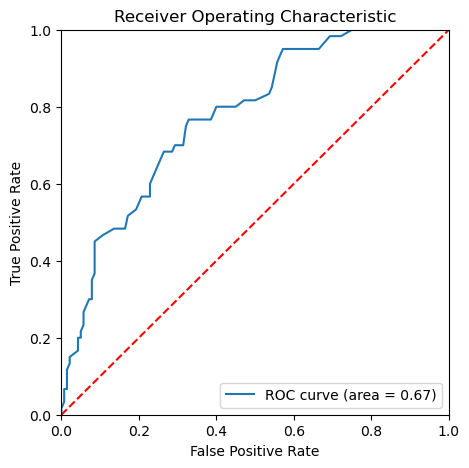

In [51]:
# all features with scaling & oversampling
rf_model_oversampling = RandomForestClassifier(random_state=0)
rf_model_smote = model(rf_model_oversampling,X_train_sam,data_prep.X_test,y_train_sam.iloc[:,0].ravel(),data_prep.y_test)

Accuracy: 0.75 | Precision: 0.604 | Recall: 0.483 | F1-Score: 0.537 | AUC: 0.674 
Confusion Matrix: 
 [[121  19]
 [ 31  29]]


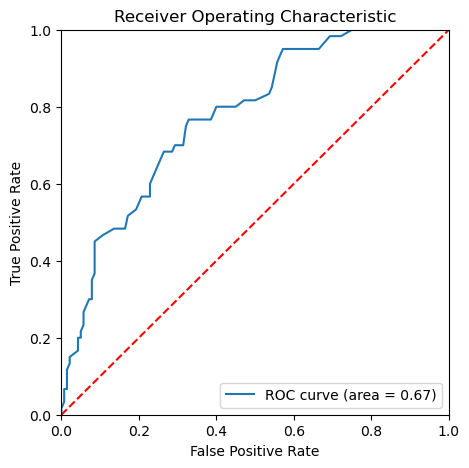

In [52]:
# feature selection & oversampling
rf_model_oversampling = RandomForestClassifier(random_state=0)
rf_model_smote_fs = model(rf_model_oversampling,X_train_sam_fs,data_prep_fs.X_test,y_train_sam_fs.iloc[:,0].ravel(),data_prep_fs.y_test)

From the results using the Random Forest algorithm, it shows that the three dataset scenarios have the same outcome, indicating that scaling and feature selection had no significant impact on the model's performance for this dataset. It also shows that hyperparameter tuning did not improve the model's results. On the other hand, implementing SMOTE-TomekLink slightly enhanced the model's performance.

# Model 2: Logistic Regression

Accuracy: 0.76 | Precision: 0.62 | Recall: 0.517 | F1-Score: 0.564 | AUC: 0.69 
Confusion Matrix: 
 [[121  19]
 [ 29  31]]


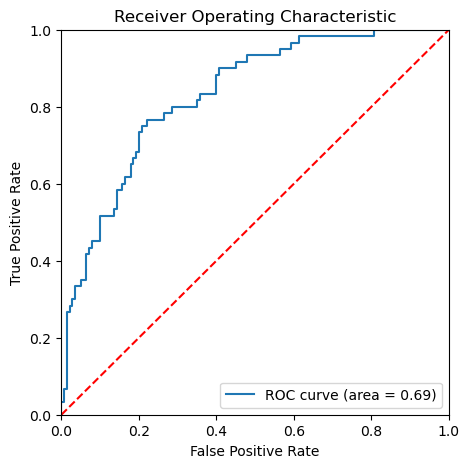

In [53]:
# all features with scaling
log_reg_model = LogisticRegression(random_state=0)
log_reg_model_with_scaler = model(log_reg_model,data_prep.X_train,data_prep.X_test,data_prep.y_train.iloc[:,0].ravel(),data_prep.y_test)

Accuracy: 0.765 | Precision: 0.633 | Recall: 0.517 | F1-Score: 0.569 | AUC: 0.694 
Confusion Matrix: 
 [[122  18]
 [ 29  31]]


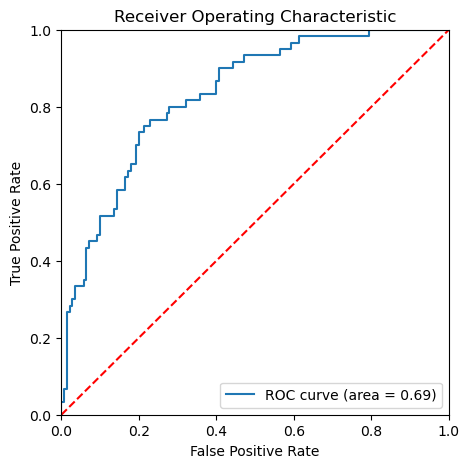

In [54]:
# all features without scaler
log_reg_model = LogisticRegression(random_state=0)
log_reg_model = model(log_reg_model,data_prep_without_scaler.X_train,data_prep_without_scaler.X_test,data_prep_without_scaler.y_train.iloc[:,0].ravel(),data_prep_without_scaler.y_test)

Accuracy: 0.76 | Precision: 0.62 | Recall: 0.517 | F1-Score: 0.564 | AUC: 0.69 
Confusion Matrix: 
 [[121  19]
 [ 29  31]]


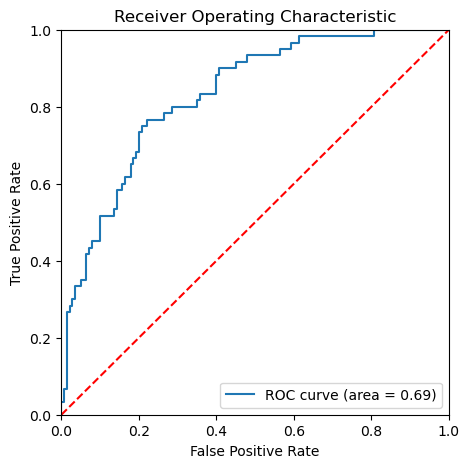

In [55]:
# feature selection
log_reg_model = LogisticRegression(random_state=0)
log_reg_model = model(log_reg_model,data_prep_fs.X_train,data_prep_fs.X_test,data_prep_fs.y_train.iloc[:,0].ravel(),data_prep_fs.y_test)

## Hyperparameter Tuning with Random Search

In [56]:
# Random Search
params = {
    "solver": ['liblinear'],
    "penalty":['l1', 'l2'],
    "C": np.logspace(0, 1, 100),
    }    
log_reg_model = LogisticRegression(random_state=0)
log_reg_random_search = random_search(parameters=params,X=data_prep.X_train,y=data_prep.y_train.iloc[:,0].ravel(),model=log_reg_model,iter=2000,cv_default = False)

Best Parameters: LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


Accuracy: 0.765 | Precision: 0.633 | Recall: 0.517 | F1-Score: 0.569 | AUC: 0.694 
Confusion Matrix: 
 [[122  18]
 [ 29  31]]


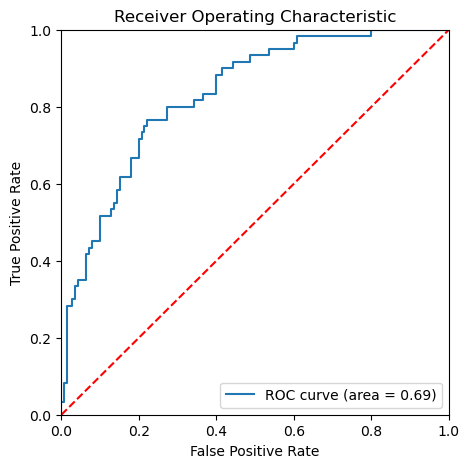

In [57]:
# all features with scaling & hyperparameter tuning
log_reg_model_tunning = LogisticRegression(C=4.977023564332112, penalty='l1', random_state=0, solver='liblinear')
log_reg_model_random_search = model(log_reg_model_tunning,data_prep.X_train,data_prep.X_test,data_prep.y_train.iloc[:,0].ravel(),data_prep.y_test)

## Oversampling SMOTE-TomekLink

Accuracy: 0.765 | Precision: 0.618 | Recall: 0.567 | F1-Score: 0.591 | AUC: 0.708 
Confusion Matrix: 
 [[119  21]
 [ 26  34]]


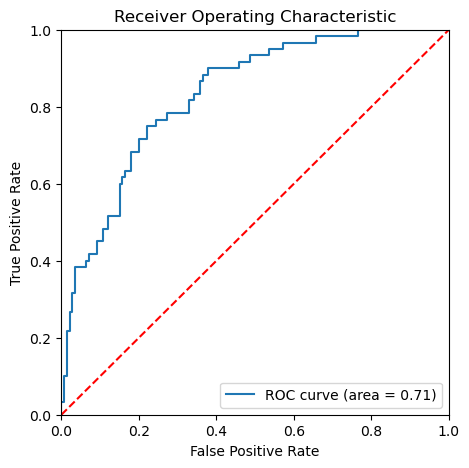

In [58]:
# all features with scaling & oversampling
log_reg_model_oversampling = LogisticRegression(random_state=0)
log_reg_model_smote = model(log_reg_model_oversampling,X_train_sam,data_prep.X_test,y_train_sam.iloc[:,0].ravel(),data_prep.y_test)

Accuracy: 0.76 | Precision: 0.688 | Recall: 0.367 | F1-Score: 0.478 | AUC: 0.648 
Confusion Matrix: 
 [[130  10]
 [ 38  22]]


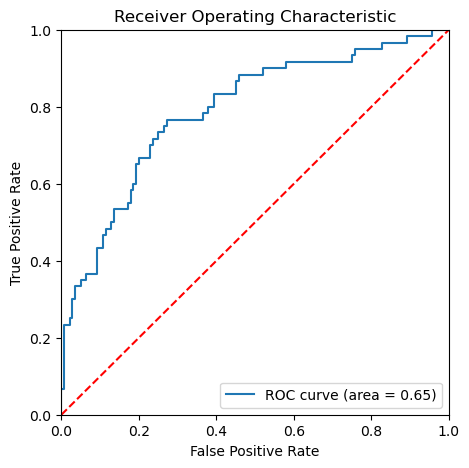

In [59]:
# all features without scaling & oversampling
log_reg_model_oversampling = LogisticRegression(random_state=0)
log_reg_model_smote = model(log_reg_model_oversampling,X_train_sam_without_scaler,data_prep.X_test,y_train_sam_without_scaler.iloc[:,0].ravel(),data_prep.y_test)

Similarly, the result using the Logistic Regression algorithm shows that scaling and feature selection did not have a significant impact on the model performance. However, the SMOTE-TomekLink slightly improved the model's results. Overall, the Logistic Regression algorithm achieved better accuracy compared to Random Forest, with the best-performing model being **the Logistic Regression with oversampling**.